In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc
from keras.layers import Activation
from keras import backend as K
import ROOT
import uproot

Using TensorFlow backend.


Welcome to JupyROOT 6.20/06


In [7]:
MC = pd.read_pickle('../MakeDataset/Run3_MC_forPUweights.pkl')
print (MC.keys())

Index([      b'Event_No',     b'GoodVertex',     b'pt_of_muon',
          b'eta_of_muon',    b'phi_of_muon', b'energy_of_muon',
            b'hcal_ieta',      b'hcal_iphi',   b'MuonIsMedium'],
      dtype='object')


In [8]:
Data = pd.read_pickle('../MakeDataset/Run3_Data_forPUweights.pkl')
print (Data.keys())

Index([      b'Event_No',     b'GoodVertex',     b'pt_of_muon',
          b'eta_of_muon',    b'phi_of_muon', b'energy_of_muon',
            b'hcal_ieta',      b'hcal_iphi',   b'MuonIsMedium'],
      dtype='object')


In [10]:
print(MC.shape)
print(Data.shape)

(3870826, 9)
(14303078, 9)


In [14]:
MC_1 = MC.loc[abs(MC[b'hcal_ieta']) == 24]
Data_1 = Data.loc[abs(Data[b'hcal_ieta']) == 24]

In [15]:
print(MC_1.shape)
print(Data_1.shape)

(377507, 9)
(1776874, 9)


In [ ]:
####Calculating PU weights

In [2]:
data_file = '/eos/cms/store/group/dpg_hcal/comm_hcal/Harjot/Muon_EraG_RECO/Validation.root'
mc_PU_file = '/eos/cms/store/group/dpg_hcal/comm_hcal/Harjot/MC/Validation_PU.root'
data = uproot.open(data_file,xrootdsource=dict(chunkbytes=1024**3, limitbytes=1024**3))['hcalHBHEMuon/TREE']
mc_PU = uproot.open(mc_PU_file,xrootdsource=dict(chunkbytes=1024**3, limitbytes=1024**3))['hcalHBHEMuon/TREE']

In [6]:
data.keys()
nVtx_data = data[b'GoodVertex'].array()

In [4]:
mc_PU.keys()
nVtx_mc = mc_PU[b'GoodVertex'].array()

In [5]:
print(nVtx_data.shape)
print(nVtx_mc.shape)

(50573284,)
(9142071,)


In [6]:
pileup_mc = nVtx_mc[((nVtx_mc <100.5) & (nVtx_mc >=9.5))]
pileup_data = nVtx_data[((nVtx_data <100.5) & (nVtx_data >=9.5))]

In [7]:
print(pileup_data.shape)
print(pileup_mc.shape)

(50560872,)
(9124937,)


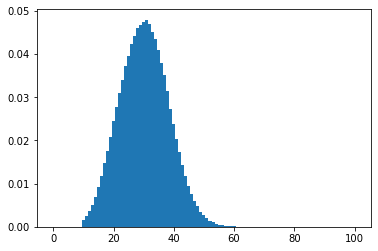

In [8]:
count_mc, bins_mc, _  = plt.hist(pileup_mc, bins = 101, range = (-0.5, 100.5), density = 1)

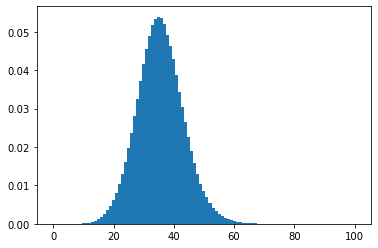

In [9]:
count_data, bins_data, _  = plt.hist(pileup_data, bins = 101, range = (-0.5, 100.5), density = 1)

In [10]:
weight = count_data/count_mc
print(weight)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan  0.07691526  0.08199761
  0.09070753  0.10139044  0.11967078  0.13814989  0.15555531  0.17563605
  0.2022811   0.22850785  0.25574456  0.29264598  0.33211799  0.38312362
  0.43108787  0.49885923  0.5584535   0.63357721  0.70723697  0.79675552
  0.8792243   0.94904031  1.04109857  1.14539853  1.2268542   1.31602131
  1.40637094  1.48212135  1.57210317  1.6914392   1.801858    1.89784112
  1.97534416  2.12409909  2.23091539  2.381565    2.44701885  2.63868516
  2.71895317  3.05221828  3.20563445  3.41527799  3.83886802  3.72892909
  4.59711565  4.81512078  4.95308277  6.17182288  6.83407974  8.24503442
  7.18333326  8.67240065 13.35899189 13.79754984 19.55910712 11.42461368
 21.8073089  11.39529859 28.33446205 32.7074927  39.70434173 18.79338842
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf   

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [11]:
weighted_pileup_mc = weight[pileup_mc]
print(weighted_pileup_mc.shape)
print(weighted_pileup_mc)
print(weighted_pileup_mc.shape)

(9124937,)
[0.70723697 0.70723697 0.13814989 ... 3.05221828 3.05221828 3.05221828]
(9124937,)


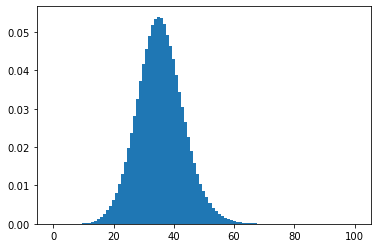

In [12]:
wcount_mc, wbins_mc, _  = plt.hist(pileup_mc, bins = 101, range = (-0.5, 100.5), weights = weighted_pileup_mc, density = 1)

In [18]:
# load saved df
df = pd.read_pickle('../MakeDataset/Run3_MC_charge_only.pkl')
print (df.keys())
print(df.shape)

Index([         b'pt_of_muon',         b'eta_of_muon',         b'phi_of_muon',
            b'energy_of_muon',           b'hcal_ieta',           b'hcal_iphi',
              b'IsolationR04',        b'IsolationR03',         b'ecal_3into3',
               b'hcal_3into3',            b'ecal_3x3',            b'hcal_1x1',
       'b'hcal_cdepthHot1'_x', 'b'hcal_cdepthHot2'_x', 'b'hcal_cdepthHot3'_x',
       'b'hcal_cdepthHot4'_x', 'b'hcal_cdepthHot5'_x', 'b'hcal_cdepthHot6'_x',
       'b'hcal_cdepthHot7'_x', 'b'hcal_cdepthHot1'_y', 'b'hcal_cdepthHot2'_y',
       'b'hcal_cdepthHot3'_y', 'b'hcal_cdepthHot4'_y', 'b'hcal_cdepthHot5'_y',
       'b'hcal_cdepthHot6'_y', 'b'hcal_cdepthHot7'_y'],
      dtype='object')
(1018659, 26)


In [17]:
# filter events

df = df.loc[abs(df[b'hcal_ieta']) == 24]

#print(df[b'hcal_ieta'])
print(df.shape)

df = df.loc[df["b'hcal_cdepthHot1'_x"] > 0.0001]
df = df.loc[df["b'hcal_cdepthHot1'_y"] > 0.0001]



(28273, 26)


In [15]:
df["b'hcal_cdepthHot1'_x"]=np.log(10000*df["b'hcal_cdepthHot1'_x"])
df["b'hcal_cdepthHot1'_y"]=np.log(10000*df["b'hcal_cdepthHot1'_y"])



#df["b'hcal_cdepthHot3'_x"]=np.log(10000*df["b'hcal_cdepthHot3'_x"])
#df["b'hcal_cdepthHot3'_y"]=np.log(10000*df["b'hcal_cdepthHot3'_y"])


In [16]:
# keep originals before scaling
df['hcal_cdepthHot1_un'] = df["b'hcal_cdepthHot1'_x"]
df['hcal_ieta_un'] = df[b'hcal_ieta']


In [17]:
# scaling input vars
cols_to_minmax =[b'pt_of_muon',b'eta_of_muon',b'phi_of_muon',b'energy_of_muon',b'hcal_ieta',
                b'hcal_iphi',     b'IsolationR04',     b'IsolationR03',
                b'ecal_3into3',      b'hcal_3into3', 
                b'ecal_3x3',         b'hcal_1x1',
               "b'hcal_cdepthHot1'_x", "b'hcal_cdepthHot2'_x", "b'hcal_cdepthHot3'_x",
               "b'hcal_cdepthHot4'_x", "b'hcal_cdepthHot5'_x", "b'hcal_cdepthHot6'_x",
               "b'hcal_cdepthHot7'_x"]

df[cols_to_minmax] = df[cols_to_minmax].apply(lambda x: (x - x.min()) /  (x.max() - x.min()))

b'pt_of_muon'


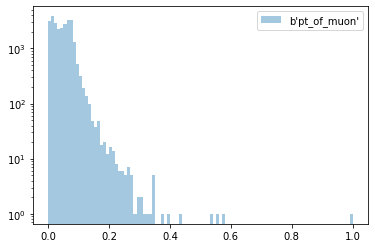

b'eta_of_muon'


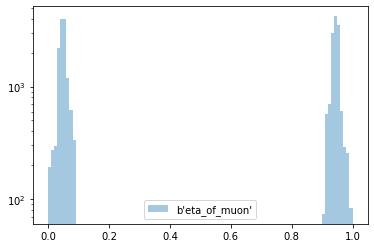

b'phi_of_muon'


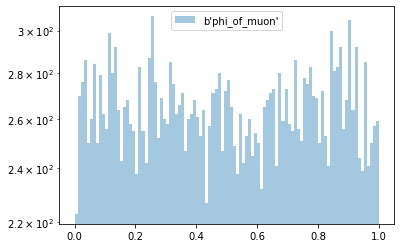

b'energy_of_muon'


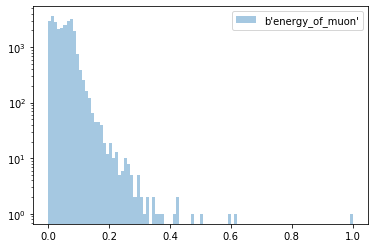

b'hcal_ieta'


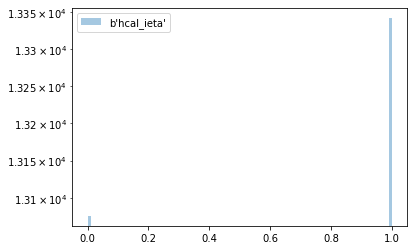

b'hcal_iphi'


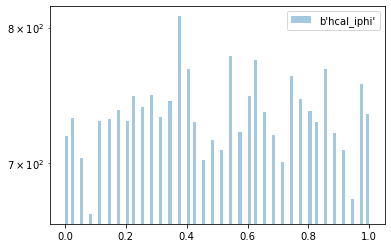

b'IsolationR04'


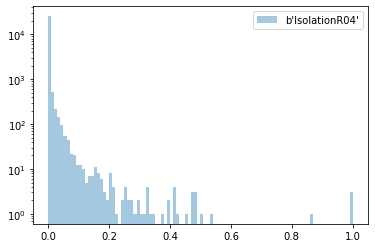

b'IsolationR03'


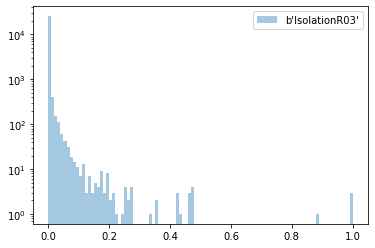

b'ecal_3into3'


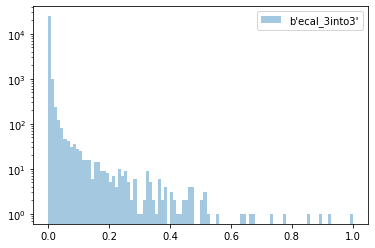

b'hcal_3into3'


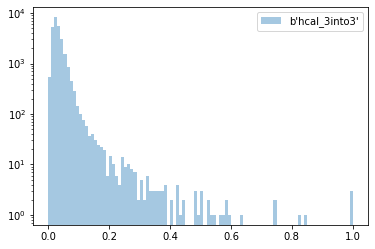

b'ecal_3x3'


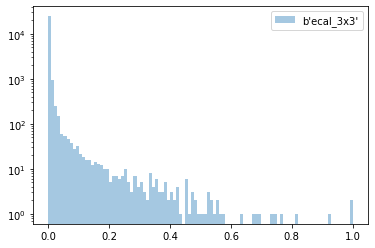

b'hcal_1x1'


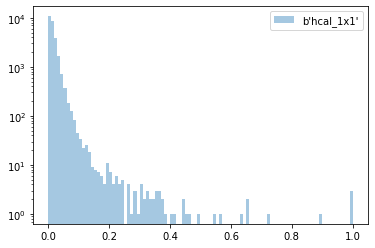

b'hcal_cdepthHot1'_x


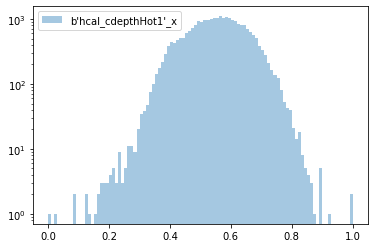

b'hcal_cdepthHot2'_x


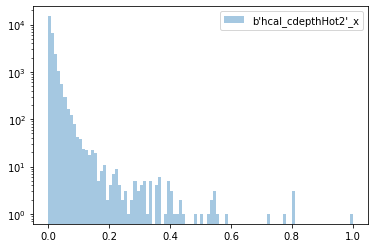

b'hcal_cdepthHot3'_x


/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6721: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6722: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

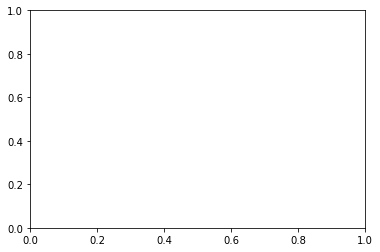

In [18]:
for i in (df.keys()):
    print (i)

    plt.hist(df[i],bins=100,label=str(i),alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [19]:
#print(df.keys)
data = df.values
print (data.shape[0])
ntest = 6700
testindx = data.shape[0] - ntest
X_train_depth1 = data[:testindx,np.r_[0:12,12]]   

Y_train_depth1 = data[:testindx,19]


X_test = data[testindx:,:]
#print(X_test)
print (X_test.shape) 
print ("shape of X_train_depth1:",X_train_depth1.shape)
#print ("shape of X_train_depth2:",X_train_depth2.shape)
print ("shape of Y_train_depth1:",Y_train_depth1.shape)

print("=========== X test ==========")
#print(df)
#print(X_test[:,33])

26418
(6700, 28)
shape of X_train_depth1: (19718, 13)
shape of Y_train_depth1: (19718,)
=========== X test ==========


sum weight_depth1: 100.0
true_hist_depth1 [ 1207 17765   746]
weight_vals_depth1: [ 2.52959738 37.23139803 60.23900459]


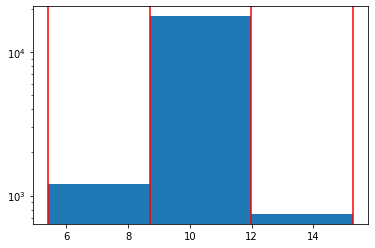

In [20]:
# sample weights
histoAR_depth1 = Y_train_depth1.copy()

nbins = 3 ### works best[4 with no sqrt / 500 with sqrt normed] / 1000 with norm*100 / 4000 ok no sqrt

true_hist_depth1 = np.histogram(histoAR_depth1,bins = nbins,
                                range=(np.min(Y_train_depth1)-0.001,np.max(Y_train_depth1)+0.001))



binweight_depth1 = true_hist_depth1[0][np.digitize(histoAR_depth1,true_hist_depth1[1]) - 1]



binweight_depth1 = 1/binweight_depth1



binweight_depth1 = 100*binweight_depth1/np.sum(np.unique(binweight_depth1)) ## 5000/5 ok





print("sum weight_depth1:",np.sum(np.unique(binweight_depth1)))
print("true_hist_depth1",true_hist_depth1[0])
#print("binweight_depth1",binweight_depth1)
print("weight_vals_depth1:",np.unique(binweight_depth1))



binweight=[binweight_depth1]
    
histoAR = [histoAR_depth1]
    
true_hist = [true_hist_depth1[1]]
    
for i in range (0,1):
    plt.hist(histoAR[i],bins=nbins)
        
    for j in true_hist[i]:
        plt.axvline(j,color='r')
        
    plt.yscale("log")
    plt.show()


In [21]:
print("shape of binweight_depth1",binweight_depth1.shape)
print("shape of weighted_pileup_mc",weighted_pileup_mc.shape)

shape of binweight_depth1 (19718,)
shape of weighted_pileup_mc (9124937,)


In [22]:
import keras.backend as kb
def custom_loss_depth(preds, targets):
    return (kb.square(preds-targets))


In [ ]:
PYTHONHASHSEED=0
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

print ("creating model=========>")

input1=Input(shape=(X_train_depth1.shape[1],))

x1 = Dense(21, activation="relu")(input1)
#x1 = Dropout(0.1)(x1)
x1 = Dense(451, activation="relu")(x1)
#x1 = Dropout(0.1)(x1)
x1 = Dense(131, activation="relu")(x1)
#x1 = Dropout(0.13)(x1)
x1 = Dense(1)(x1)
x1 = Model(inputs=input1, outputs=x1)

model = Model(inputs=x1.input, outputs=x1.output)

model.compile(loss=custom_loss_depth,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics='accuracy')
model.summary()
print ("fitting now=========>")
history = model.fit(X_train_depth1, Y_train_depth1, batch_size=3000, 
                      epochs=300, validation_split=0.1, verbose=1,sample_weight=binweight_depth1)


In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.savefig('Plots/ieta24_Depth=1_LossFunction.png')
#plt.savefig('Plots/ieta24_Depth=1_LossFunction.pdf')
#plt.savefig('ieta24_Depth=1_LossFunction_May8.png')
plt.show()


In [ ]:
# evaluate model

preds = model.predict(X_test[:,np.r_[0:12,12]] )

targets = X_test[:,19]
    
uncorrected = X_test[:,26]

#preds = preds.reshape(preds.shape[1],preds.shape[0])

targets = targets.reshape(targets.shape[0],1)
uncorrected = uncorrected.reshape(uncorrected.shape[0],1)
#print(preds)
print("------------------------")
#print(targets)

pred_1=np.round(np.exp(preds)/10000,3)
targets_1=np.round(np.exp(targets)/10000,3)
uncorrected_1=np.round(np.exp(uncorrected)/10000,3)

#np.savetxt('TextFiles/predicted_ieta24_depth1.txt', pred_1, fmt='%10.4f')
#np.savetxt('TextFiles/truth_NoPU_ieta24_depth1.txt', targets_1, fmt='%10.4f')
#np.savetxt('TextFiles/truth_PU_ieta24_depth1.txt', uncorrected_1, fmt='%10.4f')

In [ ]:
from matplotlib import gridspec
%matplotlib inline
i=0



fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
ax = plt.subplot(gs[0])
a=round(np.mean(targets[:,i]),3)
b=round(np.mean(preds),3)
ns, bins, patches = ax.hist([targets[:,i], preds[:,i], uncorrected[:,i]], 
                            histtype='step', bins=200,  range=(0,20), linewidth=1.5,
                            label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                            color= ['red', 'green', 'yellow'], )
ax.legend(loc='upper right')
ax.set_yscale('log')    
plt.xlim(0,20)


plt.title('Depth=1', loc='right')
    
ax1 = plt.subplot(gs[1])
ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
plt.ylabel('predicted / truth no PU')
ax1.plot([-1, 21], [1, 1])
plt.xlim(0,20)
plt.ylim(-2,5)
#plt.savefig('Plots_Dec2021/ieta'+str(ieta)+'_'+str(k)+'_log.png')
#plt.savefig('Plots_Dec2021/ieta'+str(ieta)+'_'+str(k)+'_log.pdf')
plt.show()


In [ ]:
import statistics
b=(np.exp(preds)/10000)
#print((np.exp(preds)/10000).mean())
#print (df)
#x=df.loc[abs(df['hcal_ieta_un']) == 23]
#print(x)
#if x==23:
  #  print(df['hcal_ieta_un'])

In [ ]:
from matplotlib import gridspec
%matplotlib inline
i=0

fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
ax = plt.subplot(gs[0])
a=round(np.mean(np.exp((targets[:,i]))/10000),3)
b=round(np.mean(np.exp(preds[:,i])/10000),3)
ns, bins, patches = ax.hist([(np.exp((targets[:,i]))/10000), (np.exp(preds[:,i])/10000),
                                 (np.exp(uncorrected[:,i])/10000)], histtype='step', bins=30,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
ax.legend(loc='upper right')
ax.set_yscale('log')   
plt.xlim(0,3)

plt.title('Depth=1', loc='right')
plt.title('ieta=24', loc='left')   
ax1 = plt.subplot(gs[1])
error=(ns[1]/ns[0])*(np.sqrt((1/ns[1])+(1/ns[0])))
ax1.errorbar(bins[:-1], ns[1] / ns[0], yerr=error, xerr=None,  fmt='o')
plt.ylabel('predicted / truth no PU')
ax1.plot([-1, 3], [1, 1])
plt.xlim(0,3)
plt.ylim(-2,4)
#plt.savefig('Plots/ieta24_Depth=1_1.png')
#plt.savefig('Plots/ieta24_Depth=1_1.pdf')
plt.show()
    



In [ ]:
y_23=X_test[:,:][X_test[:, 33] == 23]
y_24=X_test[:,:][X_test[:, 33] == 24]
y_25=X_test[:,:][X_test[:, 33] == 25]

preds_23 = model.predict(y_23[:,np.r_[0:12,12]])
preds_24 = model.predict(y_24[:,np.r_[0:12,12]])
preds_25 = model.predict(y_25[:,np.r_[0:12,12]])

targets_23 = y_23[:,19]
targets_24 = y_24[:,19]
targets_25 = y_25[:,19]

uncorrected_23 = y_23[:,26]
uncorrected_24 = y_24[:,26]
uncorrected_25 = y_25[:,26]

targets_23 = targets_23.reshape(targets_23.shape[0],1)
targets_24 = targets_24.reshape(targets_24.shape[0],1)
targets_25 = targets_25.reshape(targets_25.shape[0],1)

uncorrected_23 = uncorrected_23.reshape(uncorrected_23.shape[0],1)
uncorrected_24 = uncorrected_24.reshape(uncorrected_24.shape[0],1)
uncorrected_25 = uncorrected_25.reshape(uncorrected_25.shape[0],1)


preds_23_1=np.round(np.exp(preds_23)/10000,3)
targets_23_1=np.round(np.exp(targets_23)/10000,3)
uncorrected_23_1=np.round(np.exp(uncorrected_23)/10000,3)
np.savetxt('TextFiles/predicted_ieta23_depth1.txt', preds_23_1, fmt='%10.4f')
np.savetxt('TextFiles/truth_NoPU_ieta23_depth1.txt', targets_23_1, fmt='%10.4f')
np.savetxt('TextFiles/truth_PU_ieta23_depth1.txt', uncorrected_23_1, fmt='%10.4f')

preds_24_1=np.round(np.exp(preds_24)/10000,3)
targets_24_1=np.round(np.exp(targets_24)/10000,3)
uncorrected_24_1=np.round(np.exp(uncorrected_24)/10000,3)
np.savetxt('TextFiles/predicted_ieta24_depth1.txt', preds_24_1, fmt='%10.4f')
np.savetxt('TextFiles/truth_NoPU_ieta24_depth1.txt', targets_24_1, fmt='%10.4f')
np.savetxt('TextFiles/truth_PU_ieta24_depth1.txt', uncorrected_24_1, fmt='%10.4f')

preds_25_1=np.round(np.exp(preds_25)/10000,3)
targets_25_1=np.round(np.exp(targets_25)/10000,3)
uncorrected_25_1=np.round(np.exp(uncorrected_25)/10000,3)
np.savetxt('TextFiles/predicted_ieta25_depth1.txt', preds_25_1, fmt='%10.4f')
np.savetxt('TextFiles/truth_NoPU_ieta25_depth1.txt', targets_25_1, fmt='%10.4f')
np.savetxt('TextFiles/truth_PU_ieta25_depth1.txt', uncorrected_25_1, fmt='%10.4f')


#print(preds_23)
print("------------------------")
#print(targets_23)

In [ ]:
from matplotlib import gridspec
%matplotlib inline
i=0

fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
ax = plt.subplot(gs[0])
a=round(np.mean(np.exp((targets_23[:,i]))/10000),3)
b=round(np.mean(np.exp(preds_23[:,i])/10000),3)
ns, bins, patches = ax.hist([(np.exp((targets_23[:,i]))/10000), (np.exp(preds_23[:,i])/10000),
                                 (np.exp(uncorrected_23[:,i])/10000)], histtype='step', bins=30,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
ax.legend(loc='upper right')
ax.set_yscale('log')   
plt.xlim(0,3)

plt.title('Depth=1', loc='right')
plt.title('ieta=23', loc='left')   
ax1 = plt.subplot(gs[1])
error=(ns[1]/ns[0])*(np.sqrt((1/ns[1])+(1/ns[0])))
ax1.errorbar(bins[:-1], ns[1] / ns[0], yerr=error, xerr=None,  fmt='o')
plt.ylabel('predicted / truth no PU')
ax1.plot([-1, 3], [1, 1])
plt.xlim(0,3)
plt.ylim(0,2)
plt.savefig('Plots_Dec2021/ieta23_Depth=1_Dec23.png')
plt.savefig('Plots_Dec2021/ieta23_Depth=1_Dec23.pdf')
plt.show()

In [ ]:
from matplotlib import gridspec
%matplotlib inline
i=0

fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
ax = plt.subplot(gs[0])
a=round(np.mean(np.exp((targets_24[:,i]))/10000),3)
b=round(np.mean(np.exp(preds_24[:,i])/10000),3)
ns, bins, patches = ax.hist([(np.exp((targets_24[:,i]))/10000), (np.exp(preds_24[:,i])/10000),
                                 (np.exp(uncorrected_24[:,i])/10000)], histtype='step', bins=30,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
ax.legend(loc='upper right')
ax.set_yscale('log')   
plt.xlim(0,3)

plt.title('Depth=1', loc='right')
plt.title('ieta=24', loc='left')   
ax1 = plt.subplot(gs[1])
error=(ns[1]/ns[0])*(np.sqrt((1/ns[1])+(1/ns[0])))
ax1.errorbar(bins[:-1], ns[1] / ns[0], yerr=error, xerr=None,  fmt='o')
plt.ylabel('predicted / truth no PU')
ax1.plot([-1, 3], [1, 1])
plt.xlim(0,3)
plt.ylim(0,2)
plt.savefig('Plots_Dec2021/ieta24_Depth=1_Dec23.png')
plt.savefig('Plots_Dec2021/ieta24_Depth=1_Dec23.pdf')
plt.show()

In [ ]:
from matplotlib import gridspec
%matplotlib inline
i=0

fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
ax = plt.subplot(gs[0])
a=round(np.mean(np.exp((targets_25[:,i]))/10000),3)
b=round(np.mean(np.exp(preds_25[:,i])/10000),3)
ns, bins, patches = ax.hist([(np.exp((targets_25[:,i]))/10000), (np.exp(preds_25[:,i])/10000),
                                 (np.exp(uncorrected_25[:,i])/10000)], histtype='step', bins=30,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
ax.legend(loc='upper right')
ax.set_yscale('log')   
plt.xlim(0,3)

plt.title('Depth=1', loc='right')
plt.title('ieta=25', loc='left')   
ax1 = plt.subplot(gs[1])
error=(ns[1]/ns[0])*(np.sqrt((1/ns[1])+(1/ns[0])))
ax1.errorbar(bins[:-1], ns[1] / ns[0], yerr=error, xerr=None,  fmt='o')
plt.ylabel('predicted / truth no PU')
ax1.plot([-1, 3], [1, 1])
plt.xlim(0,3)
plt.ylim(0,2)
plt.savefig('Plots_Dec2021/ieta25_Depth=1_Dec23.png')
plt.savefig('Plots_Dec2021/ieta25_Depth=1_Dec23.pdf')
plt.show()

In [ ]:
#save model
import os
if not os.path.exists('model'):
    os.makedirs('model')
#model.save('model/model_ieta23to25_Depth1_Dec23.h5')

In [ ]:
import h5py
hf=h5py.File('model/model_ieta23to25_Depth1_Dec23.h5','r')
hf.keys()